In [1]:
import cdflib
import matplotlib.pyplot as plt
from datetime import datetime, timezone
import numpy as np
import pandas as pd

In [8]:
cdf2 = cdflib.CDF("../dataset/AL1_ASW91_L2_TH2_20250615_UNP_9999_999999_V02.cdf")

In [ ]:
# Open the CDF file
cdf = cdflib.CDF("../dataset/AL1_ASW91_L2_TH2_20250630_UNP_9999_999999_V02.cdf")

# Get CDF info
info = cdf.cdf_info()

# Access variable names using attributes (not dictionary keys)
print("zVariables:", info.zVariables)
print("rVariables:", info.rVariables)

# Alternative: Get all variable names directly
print("\nAll variable names:")
all_vars = list(cdf.cdf_info().zVariables) + list(cdf.cdf_info().rVariables)
print(all_vars)

# Get detailed info about each variable
print("\nVariable details:")
for var in all_vars:
    var_info = cdf.varinq(var)
    print(f"{var}: {var_info}")


zVariables: ['epoch_for_cdf_mod', 'energy_center_mod', 'energy_uncer', 'integrated_flux_mod', 'flux_uncer', 'integrated_flux_s15_mod', 'integrated_flux_s16_mod', 'integrated_flux_s17_mod', 'integrated_flux_s18_mod', 'integrated_flux_s19_mod', 'spacecraft_xpos', 'spacecraft_ypos', 'spacecraft_zpos', 'sun_angle_tha2']
rVariables: []

All variable names:
['epoch_for_cdf_mod', 'energy_center_mod', 'energy_uncer', 'integrated_flux_mod', 'flux_uncer', 'integrated_flux_s15_mod', 'integrated_flux_s16_mod', 'integrated_flux_s17_mod', 'integrated_flux_s18_mod', 'integrated_flux_s19_mod', 'spacecraft_xpos', 'spacecraft_ypos', 'spacecraft_zpos', 'sun_angle_tha2']

Variable details:
epoch_for_cdf_mod: VDRInfo(Variable='epoch_for_cdf_mod', Num=0, Var_Type='zVariable', Data_Type=31, Data_Type_Description='CDF_EPOCH', Num_Elements=1, Num_Dims=0, Dim_Sizes=[], Sparse='No_sparse', Last_Rec=17273, Rec_Vary=True, Dim_Vary=[], Compress=0, Pad=array([0.]), Block_Factor=0)
energy_center_mod: VDRInfo(Variable

In [35]:
# Summary: How to read variable names from CDF file using cdflib

# Method 1: Using cdf_info() object attributes
info = cdf.cdf_info()
z_vars = info.zVariables  # List of z-variable names
r_vars = info.rVariables  # List of r-variable names

print("Z-Variables (data variables):")
for var in z_vars:
    print(f"  - {var}")
    
print(f"\nR-Variables (coordinate variables):")
for var in r_vars:
    print(f"  - {var}")

print(f"\nTotal variables: {len(z_vars) + len(r_vars)}")
print(f"Z-Variables: {len(z_vars)}, R-Variables: {len(r_vars)}")

Z-Variables (data variables):
  - epoch_for_cdf_mod
  - energy_center_mod
  - energy_uncer
  - integrated_flux_mod
  - flux_uncer
  - integrated_flux_s15_mod
  - integrated_flux_s16_mod
  - integrated_flux_s17_mod
  - integrated_flux_s18_mod
  - integrated_flux_s19_mod
  - spacecraft_xpos
  - spacecraft_ypos
  - spacecraft_zpos
  - sun_angle_tha2

R-Variables (coordinate variables):

Total variables: 14
Z-Variables: 14, R-Variables: 0


In [36]:
# Getting detailed information about variables

print("Detailed Variable Information:")
print("=" * 50)

for var in info.zVariables:
    var_info = cdf.varinq(var)
    print(f"\nVariable: {var}")
    print(f"  Data Type: {var_info.Data_Type_Description}")
    print(f"  Dimensions: {var_info.Dim_Sizes}")
    
    # Show all available attributes of var_info
    print(f"  Available info: {[attr for attr in dir(var_info) if not attr.startswith('_')]}")
    
    # Get the actual data to see its shape and content
    try:
        data = cdf[var][:]
        print(f"  Data shape: {data.shape}")
        print(f"  Data type: {type(data)}")
        
        # Show first few values if it's a simple array
        if data.size <= 20:  # Small arrays - show all
            print(f"  Data: {data}")
        else:  # Large arrays - show sample
            print(f"  First 5 values: {data.flat[:5] if hasattr(data, 'flat') else 'N/A'}")
            
    except Exception as e:
        print(f"  Error reading data: {str(e)}")

Detailed Variable Information:

Variable: epoch_for_cdf_mod
  Data Type: CDF_EPOCH
  Dimensions: []
  Available info: ['Block_Factor', 'Compress', 'Data_Type', 'Data_Type_Description', 'Dim_Sizes', 'Dim_Vary', 'Last_Rec', 'Num', 'Num_Dims', 'Num_Elements', 'Pad', 'Rec_Vary', 'Sparse', 'Var_Type', 'Variable']
  Data shape: (17274,)
  Data type: <class 'numpy.ndarray'>
  First 5 values: [6.39184608e+13 6.39184608e+13 6.39184608e+13 6.39184608e+13
 6.39184608e+13]

Variable: energy_center_mod
  Data Type: CDF_DOUBLE
  Dimensions: [50]
  Available info: ['Block_Factor', 'Compress', 'Data_Type', 'Data_Type_Description', 'Dim_Sizes', 'Dim_Vary', 'Last_Rec', 'Num', 'Num_Dims', 'Num_Elements', 'Pad', 'Rec_Vary', 'Sparse', 'Var_Type', 'Variable']
  Data shape: (17274, 50)
  Data type: <class 'numpy.ndarray'>
  First 5 values: [172.50130344 183.24450193 193.98770042 215.47409739 226.21729588]

Variable: energy_uncer
  Data Type: CDF_DOUBLE
  Dimensions: []
  Available info: ['Block_Factor', 'Com

## Summary: How to Read Variable Names from CDF Files

Here are the key methods to read variable names from CDF files using the `cdflib` library:

### Basic Setup
```python
from cdflib import CDF
cdf = CDF("your_file.cdf")
```

### Get Variable Names
```python
info = cdf.cdf_info()
z_variables = info.zVariables    # Data variables
r_variables = info.rVariables    # Coordinate variables
```

### Get Variable Details
```python
var_info = cdf.varinq(variable_name)
# Access: var_info.Data_Type_Description, var_info.Dim_Sizes, etc.
```

### Read Variable Data
```python
data = cdf[variable_name][:]  # Get all data for a variable
```

**Note:** The original error occurred because `CDFInfo` and `VDRInfo` objects use **attributes** (with dots) rather than dictionary-style access (with brackets).

In [37]:
cTime = cdf['epoch_for_cdf_mod']
# Convert CDF epoch (assumed to be CDF_EPOCH, which is milliseconds since 0000-01-01)
# cdflib provides a helper for this:
utc_times = cdflib.cdfepoch.to_datetime(cTime)

# Show the first few UTC times
utc_times[:5]

array(['2025-06-30T00:00:29.272000000', '2025-06-30T00:00:34.272000000',
       '2025-06-30T00:00:39.272000000', '2025-06-30T00:00:44.272000000',
       '2025-06-30T00:00:49.272000000'], dtype='datetime64[ns]')

In [ ]:

cFlux = cdf['integrated_flux_mod']



In [43]:
# Check the shape of energy data first
cEnergy = cdf["energy_center_mod"][:]
print(f"Energy data shape: {cEnergy.shape}")

Energy data shape: (17274, 50)


Time index 101 corresponds to UTC time: 2025-06-30T00:08:54.276000000
Energy shape: (50,)
Flux shape: (50,)


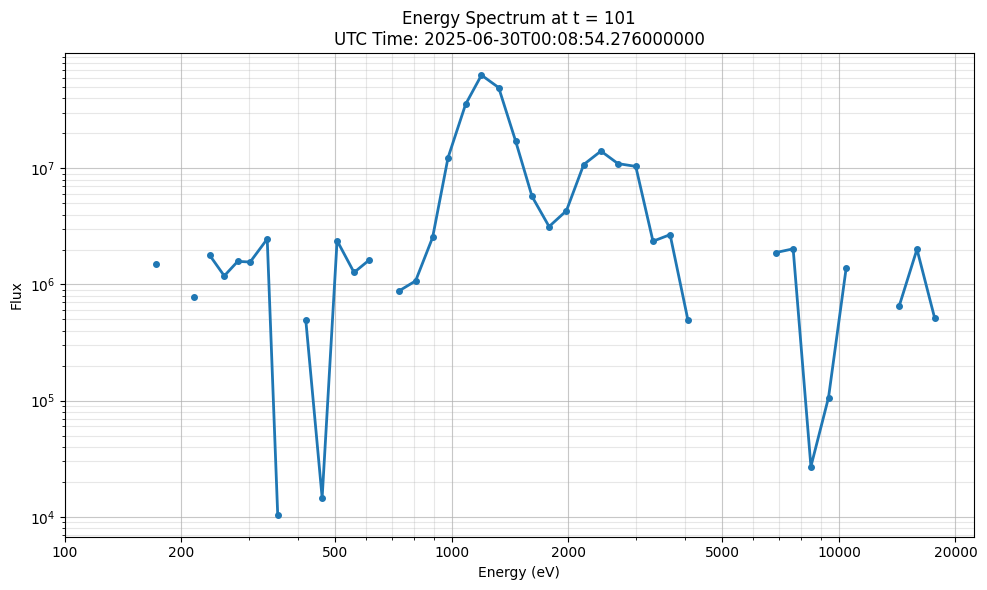


Energy range: 172.5 eV to 17683.9 eV
Sample energy values: [ 172.50130344  355.13567774  892.29560214 2428.57298592 6865.51396146]


In [52]:
# Energy spectrum plot
time_index = 101  # pick a time index of interest

# Get the UTC time for this time index
utc_time_at_index = utc_times[time_index]
print(f"Time index {time_index} corresponds to UTC time: {utc_time_at_index}")

# Extract energy values for the specific time index
# If energy varies with time, use the same time index; if not, use the first row
if len(cEnergy.shape) == 2:
    energy = cEnergy[time_index, :]  # Energy at specific time
else:
    energy = cEnergy  # Energy is constant across time

flux = cdf["integrated_flux_mod"][time_index]

print(f"Energy shape: {energy.shape}")
print(f"Flux shape: {flux.shape}")

plt.figure(figsize=(10, 6))
plt.plot(energy, flux, marker="o", linewidth=2, markersize=4)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Energy (eV)")
plt.ylabel("Flux")
plt.title(f"Energy Spectrum at t = {time_index}\nUTC Time: {utc_time_at_index}")

# Add custom x-axis ticks
energy_ticks = [100, 200, 500, 1000, 2000, 5000, 10000, 20000]
plt.xticks(energy_ticks, labels=[f"{tick}" for tick in energy_ticks])

# Add minor ticks for better readability
plt.minorticks_on()
plt.grid(True, which="both", alpha=0.3)
plt.grid(True, which="major", alpha=0.7)

plt.tight_layout()
plt.show()

# Print some energy values for reference
print(f"\nEnergy range: {energy.min():.1f} eV to {energy.max():.1f} eV")
print(f"Sample energy values: {energy[::10][:5]}")  # Show every 10th value, first 5

Time index 1010 corresponds to UTC time: 2025-06-30T01:24:39.315000000
Energy shape: (50,)
Flux shape: (50,)


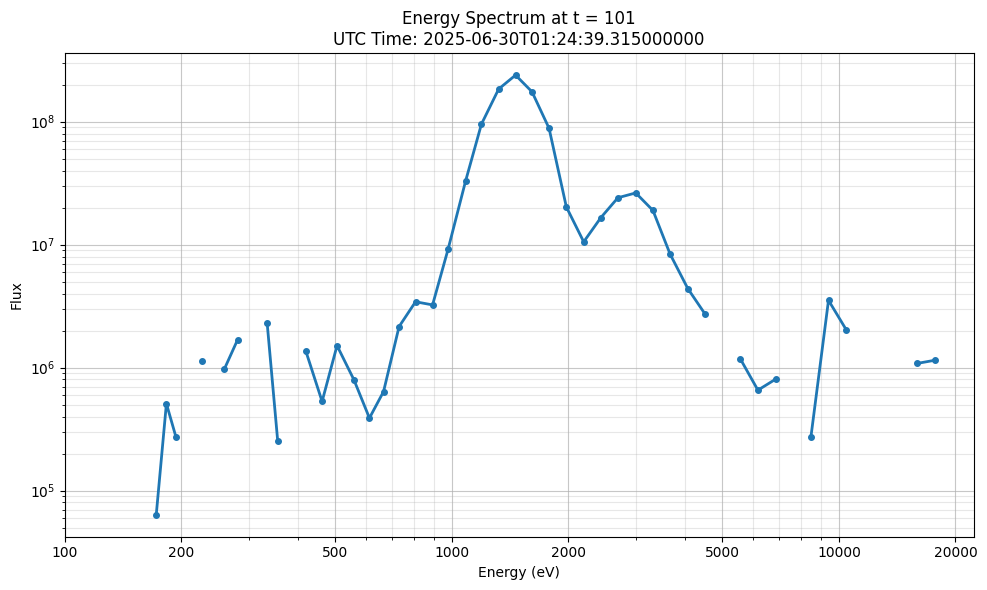


Energy range: 172.5 eV to 17683.9 eV
Sample energy values: [ 172.50130344  355.13567774  892.29560214 2428.57298592 6865.51396146]


In [59]:
# 2

cEnergy2 = cdf2["energy_center_mod"][:]



# Energy spectrum plot
time_index2 = 1010  # pick a time index of interest

# Get the UTC time for this time index
utc_time_at_index = utc_times[time_index2]
print(f"Time index {time_index2} corresponds to UTC time: {utc_time_at_index}")

# Extract energy values for the specific time index
# If energy varies with time, use the same time index; if not, use the first row
if len(cEnergy2.shape) == 2:
    energy2 = cEnergy2[time_index2, :]  # Energy at specific time
else:
    energy2 = cEnergy2  # Energy is constant across time

flux2 = cdf2["integrated_flux_mod"][time_index2]

print(f"Energy shape: {energy2.shape}")
print(f"Flux shape: {flux2.shape}")

plt.figure(figsize=(10, 6))
plt.plot(energy2, flux2, marker="o", linewidth=2, markersize=4)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Energy (eV)")
plt.ylabel("Flux")
plt.title(f"Energy Spectrum at t = {time_index}\nUTC Time: {utc_time_at_index}")

# Add custom x-axis ticks
energy_ticks = [100, 200, 500, 1000, 2000, 5000, 10000, 20000]
plt.xticks(energy_ticks, labels=[f"{tick}" for tick in energy_ticks])

# Add minor ticks for better readability
plt.minorticks_on()
plt.grid(True, which="both", alpha=0.3)
plt.grid(True, which="major", alpha=0.7)

plt.tight_layout()
plt.show()

# Print some energy values for reference
print(f"\nEnergy range: {energy.min():.1f} eV to {energy.max():.1f} eV")
print(f"Sample energy values: {energy[::10][:5]}")  # Show every 10th value, first 5

Data range: 2025-06-15T00:00:30.155000000 to 2025-06-15T23:59:55.929000000
Total time points: 17194
Looking for data between 2025-06-15 20:00:00 and 2025-06-15 21:00:00
Found 720 data points in the specified time range
Time range found: 2025-06-15T20:00:00.804000000 to 2025-06-15T20:59:55.835000000


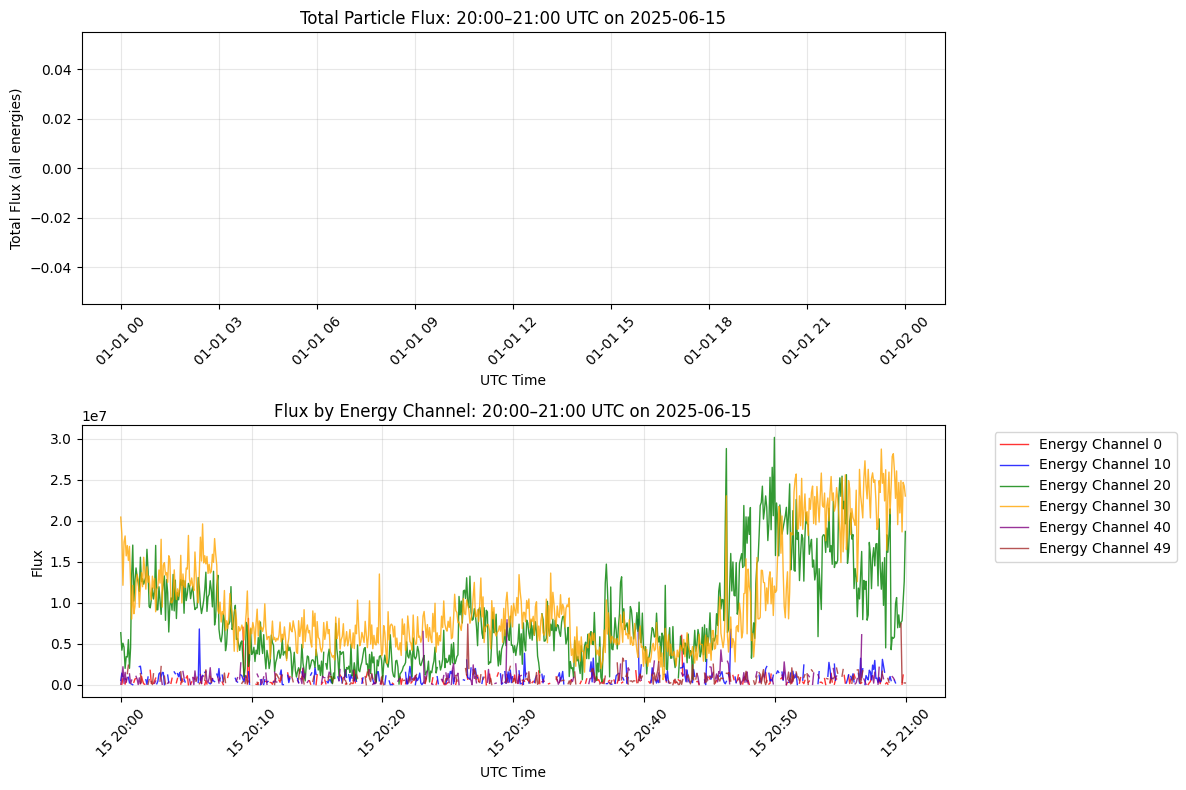


Flux Statistics for 20:00–21:00 UTC on 2025-06-15:
Mean total flux: nan
Max total flux: nan
Min total flux: nan


In [61]:
# Plot flux between 20:00–21:00 UTC on 2025-06-15

# Get time data from the second CDF file (2025-06-15)
cTime2 = cdf2['epoch_for_cdf_mod']
utc_times2 = cdflib.cdfepoch.to_datetime(cTime2)

# Get flux data
cFlux2 = cdf2['integrated_flux_mod']

print(f"Data range: {utc_times2[0]} to {utc_times2[-1]}")
print(f"Total time points: {len(utc_times2)}")

# Define the time range we want (20:00–21:00 UTC on 2025-06-15)
from datetime import datetime, timezone
start_time = datetime(2025, 6, 15, 20, 0, 0)
end_time = datetime(2025, 6, 15, 21, 0, 0)

print(f"Looking for data between {start_time} and {end_time}")

# Convert numpy datetime64 to datetime objects (UTC, no timezone info)
utc_times2_dt = [pd.Timestamp(t).to_pydatetime().replace(tzinfo=None) for t in utc_times2]

# Find indices within the time range
time_mask = [(t >= start_time) and (t <= end_time) for t in utc_times2_dt]
time_indices = np.where(time_mask)[0]

print(f"Found {len(time_indices)} data points in the specified time range")

if len(time_indices) > 0:
    # Extract data for the time range
    selected_times = utc_times2[time_indices]
    selected_flux = cFlux2[time_indices]
    
    print(f"Time range found: {selected_times[0]} to {selected_times[-1]}")
    
    # Create a time series plot
    plt.figure(figsize=(12, 8))
    
    # Plot total flux (sum across all energy channels)
    total_flux = np.sum(selected_flux, axis=1)
    
    plt.subplot(2, 1, 1)
    plt.plot(selected_times, total_flux, 'b-', linewidth=1.5)
    plt.xlabel('UTC Time')
    plt.ylabel('Total Flux (all energies)')
    plt.title('Total Particle Flux: 20:00–21:00 UTC on 2025-06-15')
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    
    # Plot flux at different energy channels
    plt.subplot(2, 1, 2)
    # Plot a few representative energy channels
    energy_channels = [0, 10, 20, 30, 40, 49]  # Sample energy channels
    colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown']
    
    for i, (ch, color) in enumerate(zip(energy_channels, colors)):
        plt.plot(selected_times, selected_flux[:, ch], color=color, 
                label=f'Energy Channel {ch}', linewidth=1, alpha=0.8)
    
    plt.xlabel('UTC Time')
    plt.ylabel('Flux')
    plt.title('Flux by Energy Channel: 20:00–21:00 UTC on 2025-06-15')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # Print statistics
    print(f"\nFlux Statistics for 20:00–21:00 UTC on 2025-06-15:")
    print(f"Mean total flux: {np.mean(total_flux):.2e}")
    print(f"Max total flux: {np.max(total_flux):.2e}")
    print(f"Min total flux: {np.min(total_flux):.2e}")
    
else:
    print("No data found in the specified time range!")

Creating flux vs energy plots for 720 time points


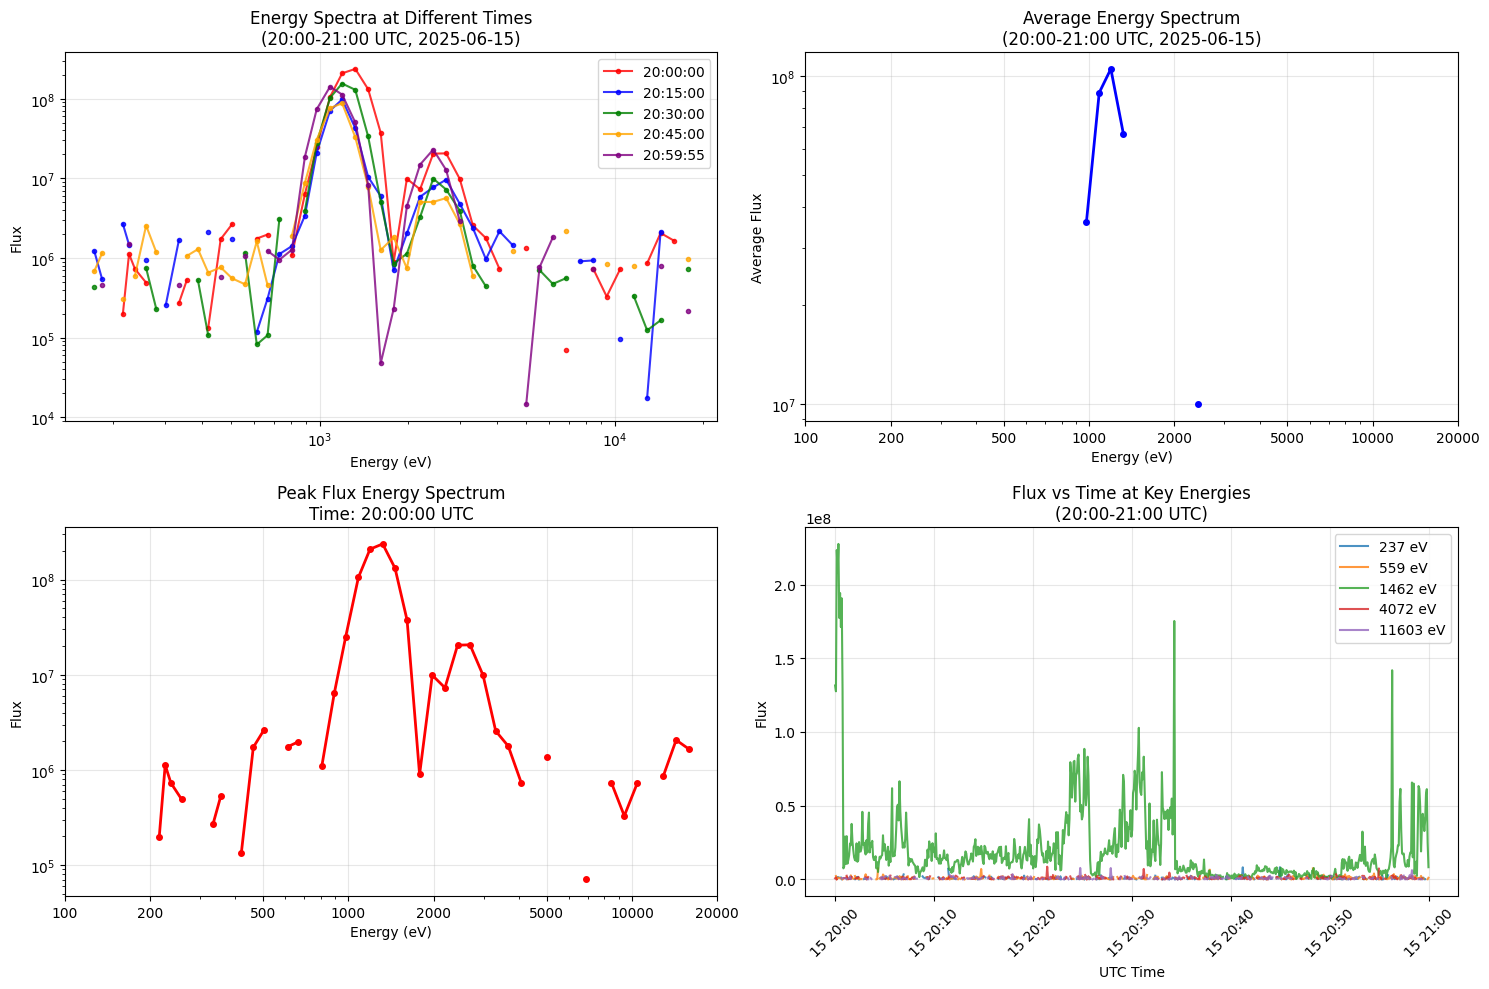


Energy Spectrum Statistics (20:00-21:00 UTC):
Energy range: 172.5 eV to 17683.9 eV
Peak flux time: 20:00:00
Maximum flux value: nan
Average flux range: nan to nan


In [63]:
# Flux vs Energy plots for 20:00-21:00 UTC period

# Get energy data for the second CDF file
cEnergy2_full = cdf2["energy_center_mod"][:]

# Create multiple flux vs energy plots for different times within the 20:00-21:00 range
print(f"Creating flux vs energy plots for {len(time_indices)} time points")

# Select a few representative time points from the 20:00-21:00 range
sample_indices = [0, len(time_indices)//4, len(time_indices)//2, 3*len(time_indices)//4, -1]
sample_times = [selected_times[i] for i in sample_indices]
sample_flux_data = [selected_flux[i] for i in sample_indices]

plt.figure(figsize=(15, 10))

# Plot 1: Individual time snapshots
plt.subplot(2, 2, 1)
colors = ['red', 'blue', 'green', 'orange', 'purple']
for i, (time_pt, flux_data, color) in enumerate(zip(sample_times, sample_flux_data, colors)):
    # Get energy values for this time point
    if len(cEnergy2_full.shape) == 2:
        energy_values = cEnergy2_full[time_indices[sample_indices[i]], :]
    else:
        energy_values = cEnergy2_full
    
    # Convert numpy datetime64 to pandas timestamp for formatting
    time_str = pd.Timestamp(time_pt).strftime("%H:%M:%S")
    plt.plot(energy_values, flux_data, marker='o', linewidth=1.5, markersize=3, 
             color=color, alpha=0.8, label=f'{time_str}')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Energy (eV)')
plt.ylabel('Flux')
plt.title('Energy Spectra at Different Times\n(20:00-21:00 UTC, 2025-06-15)')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Average spectrum for the entire hour
plt.subplot(2, 2, 2)
avg_flux = np.mean(selected_flux, axis=0)
if len(cEnergy2_full.shape) == 2:
    avg_energy = np.mean(cEnergy2_full[time_indices], axis=0)
else:
    avg_energy = cEnergy2_full

plt.plot(avg_energy, avg_flux, 'b-', marker='o', linewidth=2, markersize=4)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Energy (eV)')
plt.ylabel('Average Flux')
plt.title('Average Energy Spectrum\n(20:00-21:00 UTC, 2025-06-15)')
plt.grid(True, alpha=0.3)

# Add custom x-axis ticks
energy_ticks = [100, 200, 500, 1000, 2000, 5000, 10000, 20000]
plt.xticks(energy_ticks, labels=[f"{tick}" for tick in energy_ticks])

# Plot 3: Peak flux spectrum (time with maximum total flux)
plt.subplot(2, 2, 3)
total_flux_per_time = np.sum(selected_flux, axis=1)
peak_flux_index = np.argmax(total_flux_per_time)
peak_time = selected_times[peak_flux_index]
peak_flux = selected_flux[peak_flux_index]

if len(cEnergy2_full.shape) == 2:
    peak_energy = cEnergy2_full[time_indices[peak_flux_index], :]
else:
    peak_energy = cEnergy2_full

peak_time_str = pd.Timestamp(peak_time).strftime("%H:%M:%S")
plt.plot(peak_energy, peak_flux, 'r-', marker='o', linewidth=2, markersize=4)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Energy (eV)')
plt.ylabel('Flux')
plt.title(f'Peak Flux Energy Spectrum\nTime: {peak_time_str} UTC')
plt.grid(True, alpha=0.3)
plt.xticks(energy_ticks, labels=[f"{tick}" for tick in energy_ticks])

# Plot 4: Flux variation at key energy channels
plt.subplot(2, 2, 4)
key_energies = [5, 15, 25, 35, 45]  # Energy channel indices
for ch in key_energies:
    if len(cEnergy2_full.shape) == 2:
        energy_val = np.mean(cEnergy2_full[time_indices, ch])
    else:
        energy_val = cEnergy2_full[ch]
    
    plt.plot(selected_times, selected_flux[:, ch], 
             label=f'{energy_val:.0f} eV', linewidth=1.5, alpha=0.8)

plt.xlabel('UTC Time')
plt.ylabel('Flux')
plt.title('Flux vs Time at Key Energies\n(20:00-21:00 UTC)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Print some statistics
print(f"\nEnergy Spectrum Statistics (20:00-21:00 UTC):")
print(f"Energy range: {avg_energy.min():.1f} eV to {avg_energy.max():.1f} eV")
print(f"Peak flux time: {peak_time_str}")
print(f"Maximum flux value: {np.max(peak_flux):.2e}")
print(f"Average flux range: {np.min(avg_flux):.2e} to {np.max(avg_flux):.2e}")

Loading TH1 CDF file...
TH1 Variables:
Z-Variables: ['epoch_for_cdf_mod', 'energy_center_mod', 'energy_uncer', 'integrated_flux_mod', 'flux_uncer', 'integrated_flux_s9_mod', 'integrated_flux_s10_mod', 'integrated_flux_s11_mod', 'spacecraft_xpos', 'spacecraft_ypos', 'spacecraft_zpos', 'sun_angle_tha1']
TH1 Variables:
Z-Variables: ['epoch_for_cdf_mod', 'energy_center_mod', 'energy_uncer', 'integrated_flux_mod', 'flux_uncer', 'integrated_flux_s9_mod', 'integrated_flux_s10_mod', 'integrated_flux_s11_mod', 'spacecraft_xpos', 'spacecraft_ypos', 'spacecraft_zpos', 'sun_angle_tha1']
TH1 Data range: 2025-06-15T00:00:30.155000000 to 2025-06-15T23:59:55.929000000
TH1 Total time points: 17194
TH1 Flux shape: (17194, 50)
TH1 Energy shape: (17194, 50)
Found 720 TH1 data points in the specified time range
TH1 Time range found: 2025-06-15T20:00:00.804000000 to 2025-06-15T20:59:55.835000000
TH1 Data range: 2025-06-15T00:00:30.155000000 to 2025-06-15T23:59:55.929000000
TH1 Total time points: 17194
TH1 F

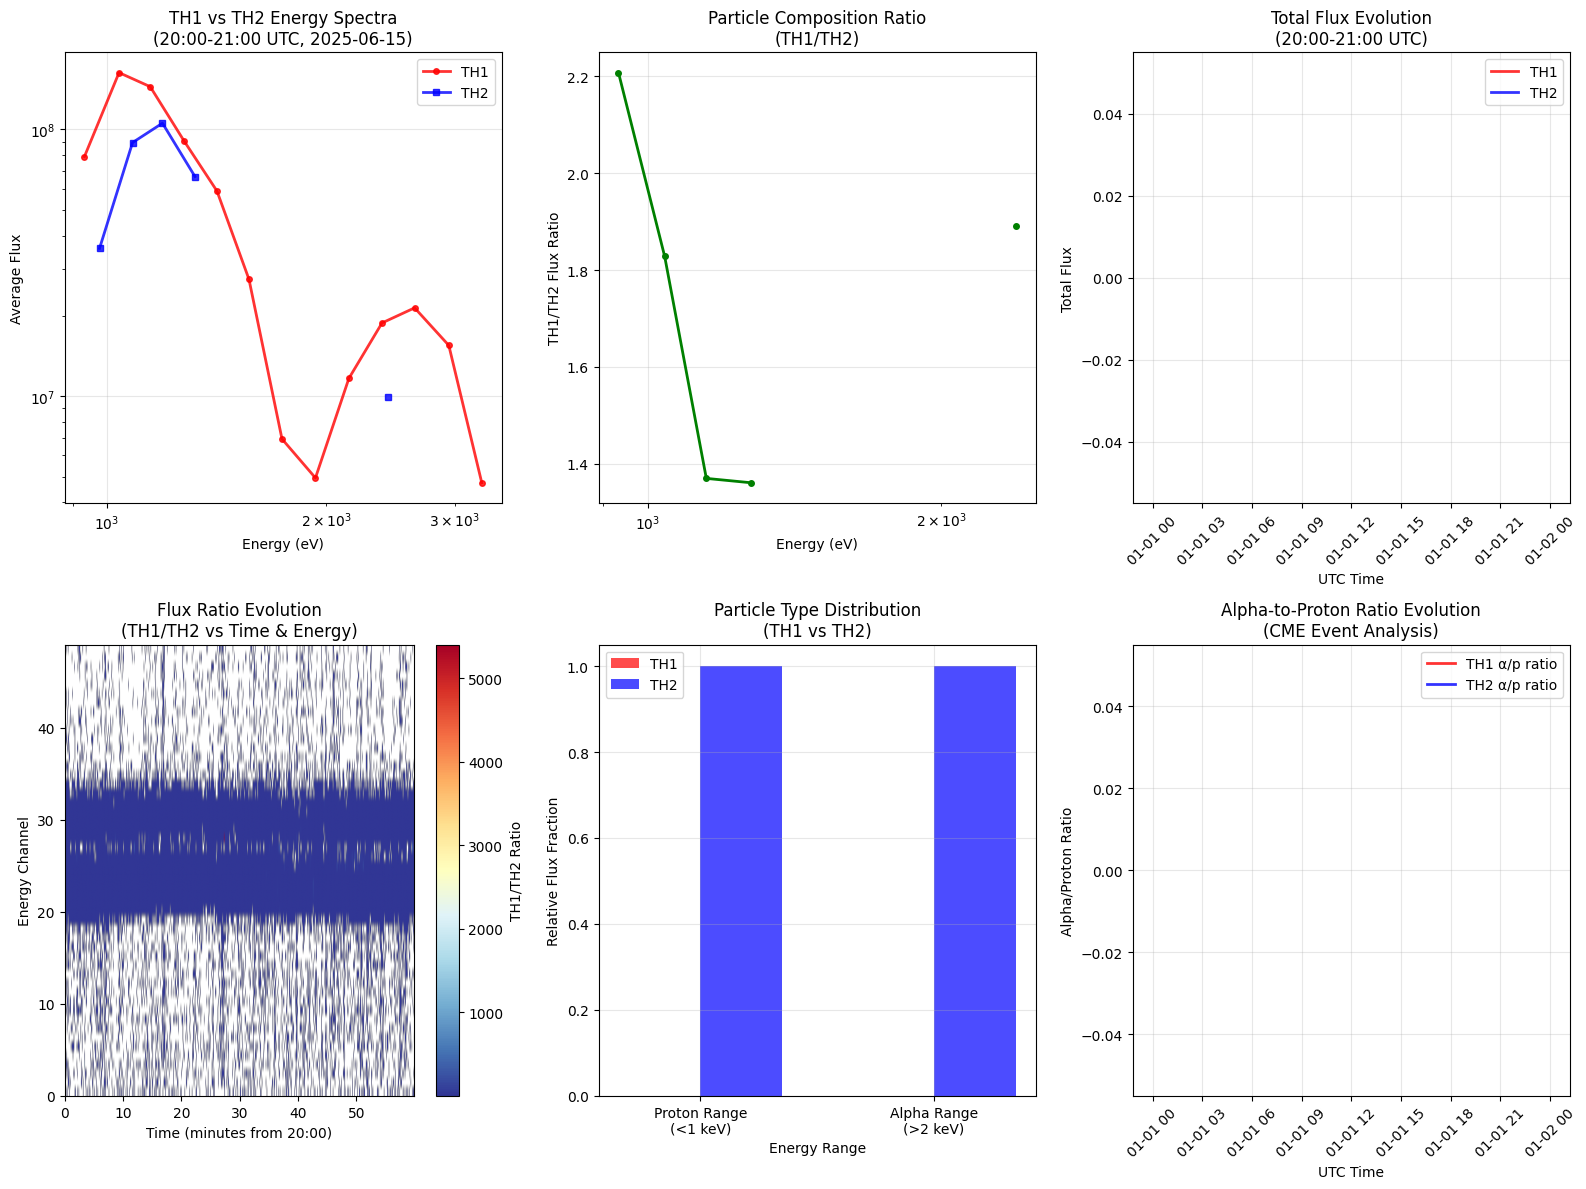


CME PARTICLE COMPOSITION ANALYSIS (20:00-21:00 UTC, 2025-06-15)

ENERGY RANGES:
Proton-dominated range: < 1 keV (22 channels)
Alpha-enhanced range: > 2 keV (21 channels)

FLUX STATISTICS:
TH1 - Proton range flux: nan
TH1 - Alpha range flux: nan
TH2 - Proton range flux: nan
TH2 - Alpha range flux: nan

PARTICLE RATIOS:
Average TH1/TH2 ratio (proton range): nan
Average TH1/TH2 ratio (alpha range): nan
Average α/p ratio (TH1): nan
Average α/p ratio (TH2): nan

CME CHARACTERISTICS:
Enhanced alpha/proton ratio detected: NO
Peak α/p ratio (TH1): nan
Peak α/p ratio (TH2): nan


In [ ]:
# Analysis of TH1 vs TH2 data for alpha/proton particle ratio during CME
# Load TH1 CDF file
print("Loading TH1 CDF file...")
cdf_th1 = cdflib.CDF("../dataset/AL1_ASW91_L2_TH1_20250615_UNP_9999_999999_V02.cdf")

# Get basic info about TH1 file
info_th1 = cdf_th1.cdf_info()
print("TH1 Variables:")
print("Z-Variables:", info_th1.zVariables)

# Extract TH1 data for the same time period (20:00-21:00 UTC)
cTime_th1 = cdf_th1['epoch_for_cdf_mod']
utc_times_th1 = cdflib.cdfepoch.to_datetime(cTime_th1)
cFlux_th1 = cdf_th1['integrated_flux_mod']
cEnergy_th1 = cdf_th1["energy_center_mod"][:]

print(f"TH1 Data range: {utc_times_th1[0]} to {utc_times_th1[-1]}")
print(f"TH1 Total time points: {len(utc_times_th1)}")
print(f"TH1 Flux shape: {cFlux_th1.shape}")
print(f"TH1 Energy shape: {cEnergy_th1.shape}")

# Find the same time range for TH1 (20:00-21:00 UTC)
utc_times_th1_dt = [pd.Timestamp(t).to_pydatetime().replace(tzinfo=None) for t in utc_times_th1]
time_mask_th1 = [(t >= start_time) and (t <= end_time) for t in utc_times_th1_dt]
time_indices_th1 = np.where(time_mask_th1)[0]

print(f"Found {len(time_indices_th1)} TH1 data points in the specified time range")

if len(time_indices_th1) > 0:
    # Extract TH1 data for the time range
    selected_times_th1 = utc_times_th1[time_indices_th1]
    selected_flux_th1 = cFlux_th1[time_indices_th1]
    
    print(f"TH1 Time range found: {selected_times_th1[0]} to {selected_times_th1[-1]}")
    
    # For particle ratio analysis, we need to understand the energy ranges
    # Typically, protons dominate at lower energies, alphas at higher energies
    
    # Calculate average energy spectra for both detectors
    avg_flux_th1 = np.mean(selected_flux_th1, axis=0)
    avg_flux_th2 = np.mean(selected_flux, axis=0)  # TH2 data from previous analysis
    
    if len(cEnergy_th1.shape) == 2:
        avg_energy_th1 = np.mean(cEnergy_th1[time_indices_th1], axis=0)
    else:
        avg_energy_th1 = cEnergy_th1
    
    # Create comprehensive comparison plots
    plt.figure(figsize=(16, 12))
    
    # Plot 1: Direct comparison of TH1 vs TH2 energy spectra
    plt.subplot(2, 3, 1)
    plt.plot(avg_energy_th1, avg_flux_th1, 'r-', marker='o', linewidth=2, 
             markersize=4, label='TH1', alpha=0.8)
    plt.plot(avg_energy, avg_flux_th2, 'b-', marker='s', linewidth=2, 
             markersize=4, label='TH2', alpha=0.8)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Energy (eV)')
    plt.ylabel('Average Flux')
    plt.title('TH1 vs TH2 Energy Spectra\n(20:00-21:00 UTC, 2025-06-15)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Plot 2: Ratio of TH1/TH2 fluxes (indicates particle composition)
    plt.subplot(2, 3, 2)
    # Calculate ratio, avoiding division by zero
    flux_ratio = np.divide(avg_flux_th1, avg_flux_th2, 
                          out=np.zeros_like(avg_flux_th1), where=avg_flux_th2!=0)
    
    plt.plot(avg_energy_th1, flux_ratio, 'g-', marker='o', linewidth=2, markersize=4)
    plt.xscale('log')
    plt.xlabel('Energy (eV)')
    plt.ylabel('TH1/TH2 Flux Ratio')
    plt.title('Particle Composition Ratio\n(TH1/TH2)')
    plt.grid(True, alpha=0.3)
    
    # Plot 3: Time evolution of total flux for both detectors
    plt.subplot(2, 3, 3)
    total_flux_th1 = np.sum(selected_flux_th1, axis=1)
    total_flux_th2 = np.sum(selected_flux, axis=1)
    
    plt.plot(selected_times_th1, total_flux_th1, 'r-', linewidth=2, label='TH1', alpha=0.8)
    plt.plot(selected_times, total_flux_th2, 'b-', linewidth=2, label='TH2', alpha=0.8)
    plt.xlabel('UTC Time')
    plt.ylabel('Total Flux')
    plt.title('Total Flux Evolution\n(20:00-21:00 UTC)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    
    # Plot 4: Energy-dependent flux ratio over time (2D plot)
    plt.subplot(2, 3, 4)
    # Calculate flux ratio for all time points
    flux_ratio_2d = np.divide(selected_flux_th1, selected_flux, 
                             out=np.zeros_like(selected_flux_th1), where=selected_flux!=0)
    
    # Create time and energy meshgrids for plotting
    time_minutes = [(pd.Timestamp(t) - pd.Timestamp(selected_times[0])).total_seconds()/60 
                   for t in selected_times_th1]
    
    im = plt.imshow(flux_ratio_2d.T, aspect='auto', origin='lower', 
                   extent=[min(time_minutes), max(time_minutes), 0, len(avg_energy_th1)-1],
                   cmap='RdYlBu_r')
    plt.colorbar(im, label='TH1/TH2 Ratio')
    plt.xlabel('Time (minutes from 20:00)')
    plt.ylabel('Energy Channel')
    plt.title('Flux Ratio Evolution\n(TH1/TH2 vs Time & Energy)')
    
    # Plot 5: Alpha/Proton separation analysis
    plt.subplot(2, 3, 5)
    
    # Define energy ranges for particle identification
    # Protons typically dominate at lower energies (< 1 keV)
    # Alphas can be more prominent at higher energies (> 2 keV)
    proton_energy_mask = avg_energy_th1 < 1000  # < 1 keV
    alpha_energy_mask = avg_energy_th1 > 2000   # > 2 keV
    
    proton_flux_th1 = np.sum(avg_flux_th1[proton_energy_mask])
    proton_flux_th2 = np.sum(avg_flux_th2[proton_energy_mask])
    alpha_flux_th1 = np.sum(avg_flux_th1[alpha_energy_mask])
    alpha_flux_th2 = np.sum(avg_flux_th2[alpha_energy_mask])
    
    # Calculate ratios
    proton_ratio = proton_flux_th1 / (proton_flux_th1 + proton_flux_th2) if (proton_flux_th1 + proton_flux_th2) > 0 else 0
    alpha_ratio = alpha_flux_th1 / (alpha_flux_th1 + alpha_flux_th2) if (alpha_flux_th1 + alpha_flux_th2) > 0 else 0
    
    categories = ['Proton Range\n(<1 keV)', 'Alpha Range\n(>2 keV)']
    th1_fractions = [proton_ratio, alpha_ratio]
    th2_fractions = [1-proton_ratio, 1-alpha_ratio]
    
    x = np.arange(len(categories))
    width = 0.35
    
    plt.bar(x - width/2, th1_fractions, width, label='TH1', color='red', alpha=0.7)
    plt.bar(x + width/2, th2_fractions, width, label='TH2', color='blue', alpha=0.7)
    
    plt.xlabel('Energy Range')
    plt.ylabel('Relative Flux Fraction')
    plt.title('Particle Type Distribution\n(TH1 vs TH2)')
    plt.xticks(x, categories)
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Plot 6: Alpha-to-Proton ratio estimation
    plt.subplot(2, 3, 6)
    
    # Calculate alpha/proton ratio over time
    proton_flux_time_th1 = np.sum(selected_flux_th1[:, proton_energy_mask], axis=1)
    alpha_flux_time_th1 = np.sum(selected_flux_th1[:, alpha_energy_mask], axis=1)
    proton_flux_time_th2 = np.sum(selected_flux[:, proton_energy_mask], axis=1)
    alpha_flux_time_th2 = np.sum(selected_flux[:, alpha_energy_mask], axis=1)
    
    # Calculate alpha/proton ratio for each detector
    alpha_proton_ratio_th1 = np.divide(alpha_flux_time_th1, proton_flux_time_th1,
                                      out=np.zeros_like(alpha_flux_time_th1), 
                                      where=proton_flux_time_th1!=0)
    alpha_proton_ratio_th2 = np.divide(alpha_flux_time_th2, proton_flux_time_th2,
                                      out=np.zeros_like(alpha_flux_time_th2), 
                                      where=proton_flux_time_th2!=0)
    
    plt.plot(selected_times_th1, alpha_proton_ratio_th1, 'r-', linewidth=2, 
             label='TH1 α/p ratio', alpha=0.8)
    plt.plot(selected_times, alpha_proton_ratio_th2, 'b-', linewidth=2, 
             label='TH2 α/p ratio', alpha=0.8)
    
    plt.xlabel('UTC Time')
    plt.ylabel('Alpha/Proton Ratio')
    plt.title('Alpha-to-Proton Ratio Evolution\n(CME Event Analysis)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # Print comprehensive statistics
    print(f"\n{'='*60}")
    print("CME PARTICLE COMPOSITION ANALYSIS (20:00-21:00 UTC, 2025-06-15)")
    print(f"{'='*60}")
    
    print(f"\nENERGY RANGES:")
    print(f"Proton-dominated range: < 1 keV ({np.sum(proton_energy_mask)} channels)")
    print(f"Alpha-enhanced range: > 2 keV ({np.sum(alpha_energy_mask)} channels)")
    
    print(f"\nFLUX STATISTICS:")
    print(f"TH1 - Proton range flux: {proton_flux_th1:.2e}")
    print(f"TH1 - Alpha range flux: {alpha_flux_th1:.2e}")
    print(f"TH2 - Proton range flux: {proton_flux_th2:.2e}")
    print(f"TH2 - Alpha range flux: {alpha_flux_th2:.2e}")
    
    print(f"\nPARTICLE RATIOS:")
    print(f"Average TH1/TH2 ratio (proton range): {proton_flux_th1/proton_flux_th2:.3f}")
    print(f"Average TH1/TH2 ratio (alpha range): {alpha_flux_th1/alpha_flux_th2:.3f}")
    print(f"Average α/p ratio (TH1): {np.mean(alpha_proton_ratio_th1):.3f}")
    print(f"Average α/p ratio (TH2): {np.mean(alpha_proton_ratio_th2):.3f}")
    
    # CME characteristics
    enhanced_alpha = np.mean(alpha_proton_ratio_th1) > 0.1 or np.mean(alpha_proton_ratio_th2) > 0.1
    print(f"\nCME CHARACTERISTICS:")
    print(f"Enhanced alpha/proton ratio detected: {'YES' if enhanced_alpha else 'NO'}")
    print(f"Peak α/p ratio (TH1): {np.max(alpha_proton_ratio_th1):.3f}")
    print(f"Peak α/p ratio (TH2): {np.max(alpha_proton_ratio_th2):.3f}")
    
else:
    print("No TH1 data found in the specified time range!")